In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from models.dqn import DQN
from rl_models.replay_buffer import ReplayBuffer
from rl_models.her import HindsightExperienceReplay
from environments.bit_flip_env import BitFlipEnv

In [3]:
n_bits = 50
env = BitFlipEnv(num_bits=n_bits)
env2 = BitFlipEnv(num_bits=n_bits)
state_dim = env.state_dim
n_actions = env.n_actions
state_dim, n_actions

(50, 50)

In [4]:
agent = DQN(state_dim * 2, n_actions, hidden_size=256)
agent2 = DQN(state_dim * 2, n_actions, hidden_size=256)

buffer = ReplayBuffer(size=1_000_000)
buffer2 = ReplayBuffer(size=1_000_000)

her = HindsightExperienceReplay(env, agent, buffer, 
                                batch_size=128,
                                max_steps=n_bits, learning_freq=40)
her2 = HindsightExperienceReplay(env2, agent2, buffer2, 
                                 batch_size=128,
                                max_steps=n_bits, learning_freq=40)

In [5]:
her.play_and_learn()

(-50.0, 0.0)

In [6]:
epochs = 40
epoch_iters = 50
success_history = []
success_history2 = []

DQN + HER  success rate = 0.99875
DQN  success rate = 0.0


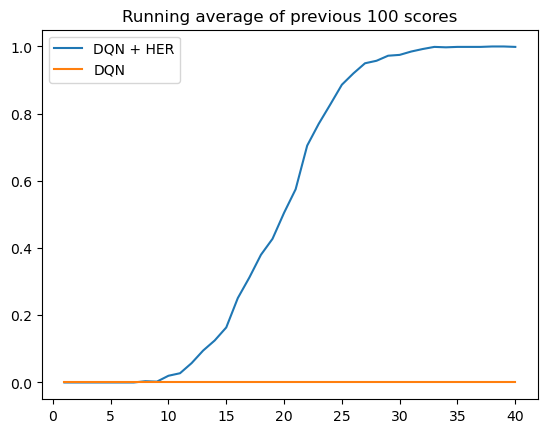

<Figure size 640x480 with 0 Axes>

In [7]:
from tqdm import tqdm
import numpy as np
from utils import plot_learning_curve
import matplotlib.pyplot as plt

for epoch in range(epochs):
    score_history = []
    score_history2 = []
    for iter in tqdm(range(epoch_iters)):
        score, success = her.play_and_learn(num_episodes=16)
        score_history.append(float(success))

        score, success = her2.play_and_learn(num_episodes=16, her=False)
        score_history2.append(float(success))

    if agent.epsilon > 0:
        agent.epsilon -= 0.01
        agent2.epsilon -= 0.01

    success_rate = np.mean(score_history)
    success_history.append(success_rate)
    plot_learning_curve(epoch + 1, success_history, name="DQN + HER") 

    success_rate2 = np.mean(score_history2)
    success_history2.append(success_rate2)
    plot_learning_curve(epoch + 1, success_history2, name="DQN") 

    print(f"DQN + HER  success rate = {success_rate}")
    print(f"DQN  success rate = {success_rate2}")
    plt.show()

plt.savefig("graphics/bits_flip_DQN_HER.png", dpi=1000)